In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Imports successful")

✓ Imports successful


In [2]:
# Load all processed datasets
kaggle_train = pd.read_csv("../data/processed/kaggle_train.csv")
kaggle_val = pd.read_csv("../data/processed/kaggle_val.csv")
kaggle_test = pd.read_csv("../data/processed/kaggle_test.csv")

liar_train = pd.read_csv("../data/processed/liar_train.csv")
liar_val = pd.read_csv("../data/processed/liar_val.csv")
liar_test = pd.read_csv("../data/processed/liar_test.csv")

print("Kaggle dataset:")
print(f"  Train: {len(kaggle_train)}, Val: {len(kaggle_val)}, Test: {len(kaggle_test)}")
print(f"\nLIAR dataset:")
print(f"  Train: {len(liar_train)}, Val: {len(liar_val)}, Test: {len(liar_test)}")

Kaggle dataset:
  Train: 27328, Val: 3904, Test: 7808

LIAR dataset:
  Train: 8886, Val: 1270, Test: 2539


In [3]:
def print_stats(df, dataset_name):
    """Print comprehensive statistics for a dataset"""
    print(f"\n{'='*60}")
    print(f"{dataset_name} Dataset Statistics")
    print('='*60)
    print(f"Total samples: {len(df):,}")
    
    print(f"\nLabel distribution:")
    label_counts = df['label'].value_counts()
    for label, count in label_counts.items():
        label_name = "Real" if label == 1 else "Fake"
        print(f"  {label_name} ({label}): {count:,} ({count/len(df)*100:.1f}%)")
    
    print(f"\nText length statistics (words):")
    word_counts = df['text'].str.split().str.len()
    print(f"  Mean:   {word_counts.mean():.1f}")
    print(f"  Median: {word_counts.median():.1f}")
    print(f"  Min:    {word_counts.min()}")
    print(f"  Max:    {word_counts.max()}")
    print(f"  Std:    {word_counts.std():.1f}")

# Print stats for both datasets
print_stats(kaggle_train, "Kaggle (Training Set)")
print_stats(liar_train, "LIAR (Training Set)")


Kaggle (Training Set) Dataset Statistics
Total samples: 27,328

Label distribution:
  Real (1): 14,823 (54.2%)
  Fake (0): 12,505 (45.8%)

Text length statistics (words):
  Mean:   409.3
  Median: 377.0
  Min:    10
  Max:    8136
  Std:    317.3

LIAR (Training Set) Dataset Statistics
Total samples: 8,886

Label distribution:
  Real (1): 4,964 (55.9%)
  Fake (0): 3,922 (44.1%)

Text length statistics (words):
  Mean:   18.2
  Median: 17.0
  Min:    5
  Max:    467
  Std:    10.8


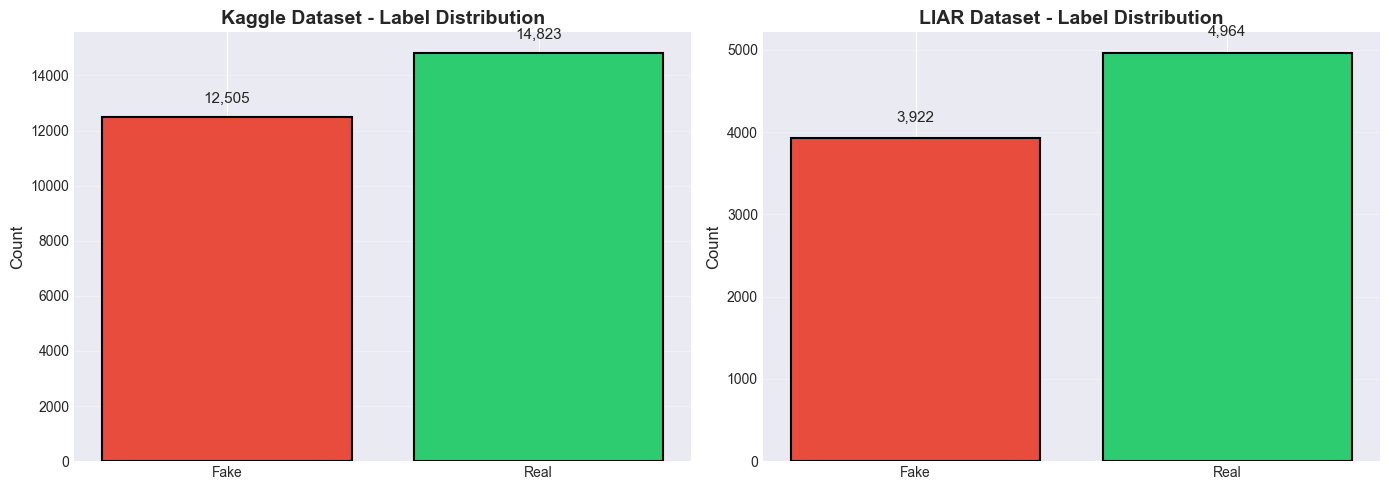

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Kaggle
kaggle_counts = kaggle_train['label'].value_counts()
axes[0].bar(['Fake', 'Real'], [kaggle_counts[0], kaggle_counts[1]], 
            color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.5)
axes[0].set_title('Kaggle Dataset - Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate([kaggle_counts[0], kaggle_counts[1]]):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=11)

# LIAR
liar_counts = liar_train['label'].value_counts()
axes[1].bar(['Fake', 'Real'], [liar_counts[0], liar_counts[1]], 
            color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.5)
axes[1].set_title('LIAR Dataset - Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate([liar_counts[0], liar_counts[1]]):
    axes[1].text(i, v + 200, f'{v:,}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

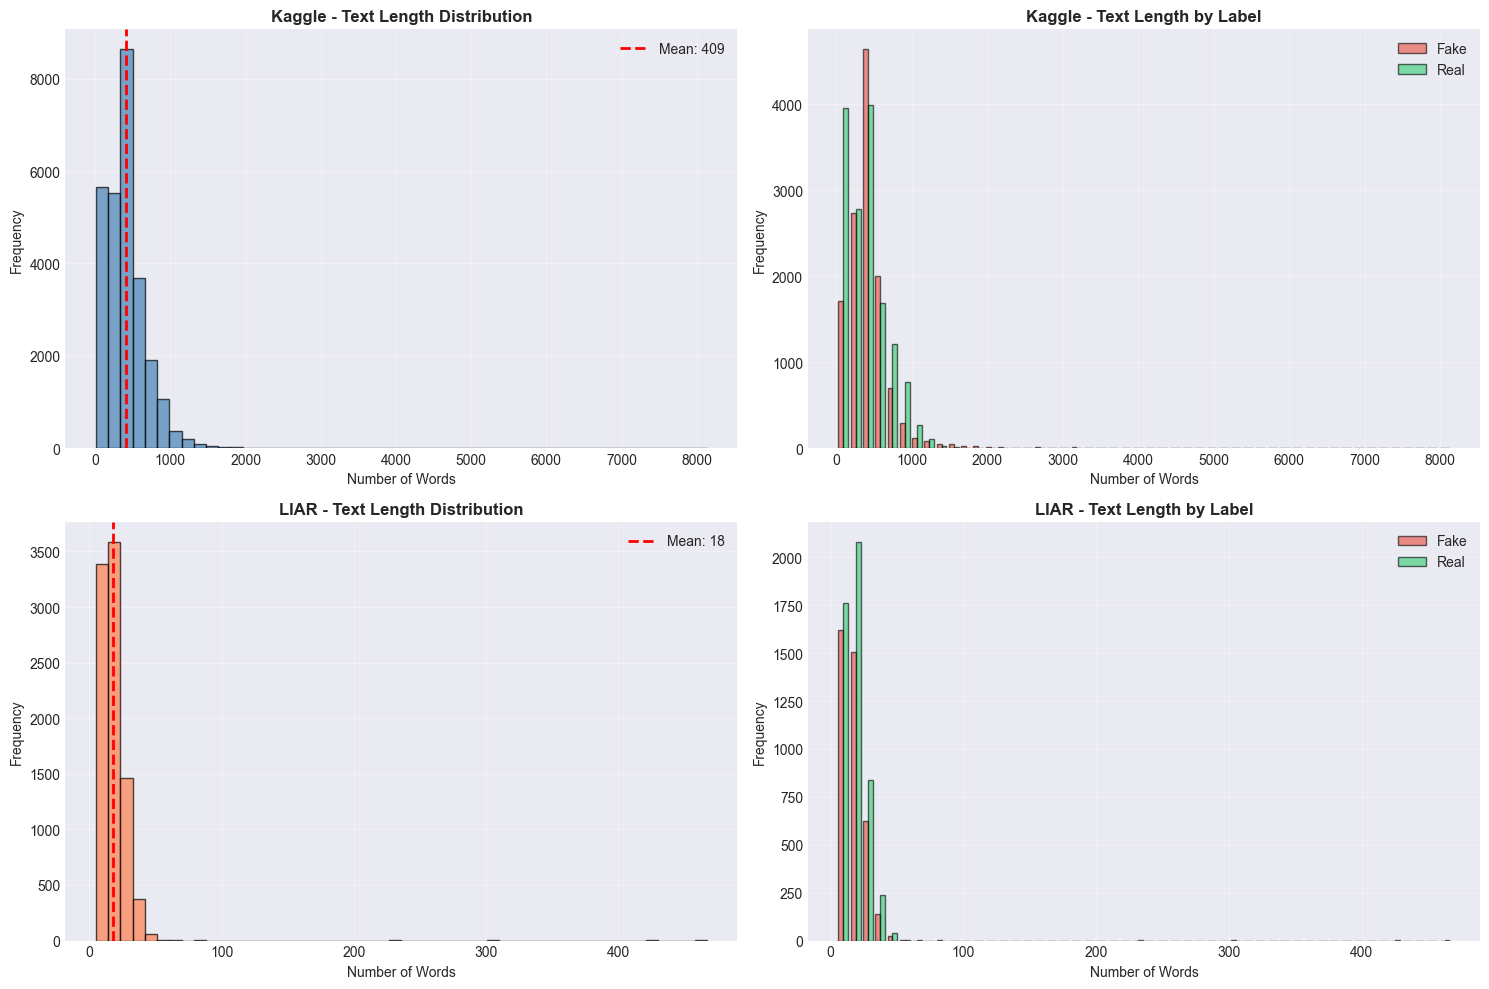


Kaggle average lengths: Fake=429.6, Real=392.2
LIAR average lengths: Fake=17.5, Real=18.6


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Kaggle - Overall
kaggle_lengths = kaggle_train['text'].str.split().str.len()
axes[0, 0].hist(kaggle_lengths, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(kaggle_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {kaggle_lengths.mean():.0f}')
axes[0, 0].set_title('Kaggle - Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Kaggle - By Label
fake_lengths = kaggle_train[kaggle_train['label'] == 0]['text'].str.split().str.len()
real_lengths = kaggle_train[kaggle_train['label'] == 1]['text'].str.split().str.len()
axes[0, 1].hist([fake_lengths, real_lengths], bins=50, label=['Fake', 'Real'], 
                color=['#e74c3c', '#2ecc71'], alpha=0.6, edgecolor='black')
axes[0, 1].set_title('Kaggle - Text Length by Label', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# LIAR - Overall
liar_lengths = liar_train['text'].str.split().str.len()
axes[1, 0].hist(liar_lengths, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].axvline(liar_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {liar_lengths.mean():.0f}')
axes[1, 0].set_title('LIAR - Text Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Words')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# LIAR - By Label
fake_lengths_liar = liar_train[liar_train['label'] == 0]['text'].str.split().str.len()
real_lengths_liar = liar_train[liar_train['label'] == 1]['text'].str.split().str.len()
axes[1, 1].hist([fake_lengths_liar, real_lengths_liar], bins=50, label=['Fake', 'Real'], 
                color=['#e74c3c', '#2ecc71'], alpha=0.6, edgecolor='black')
axes[1, 1].set_title('LIAR - Text Length by Label', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Words')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKaggle average lengths: Fake={fake_lengths.mean():.1f}, Real={real_lengths.mean():.1f}")
print(f"LIAR average lengths: Fake={fake_lengths_liar.mean():.1f}, Real={real_lengths_liar.mean():.1f}")

Generating word clouds...



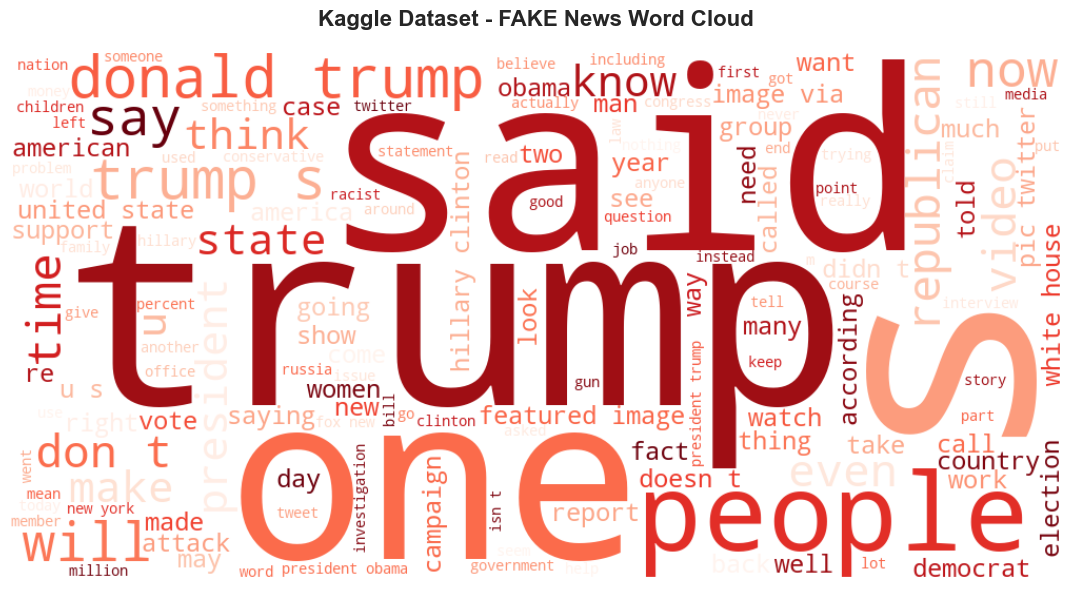

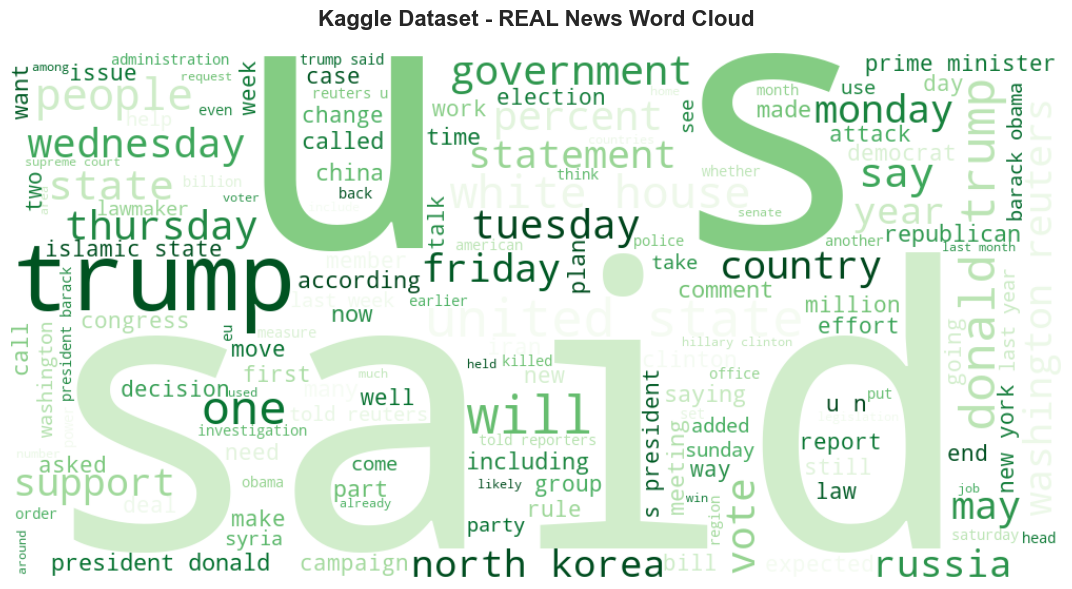

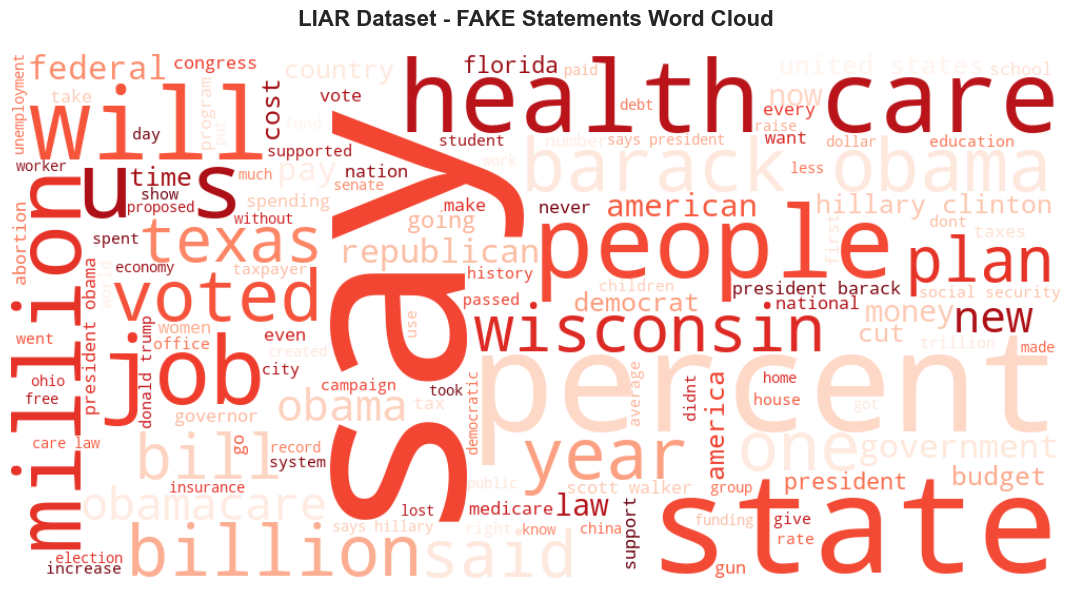

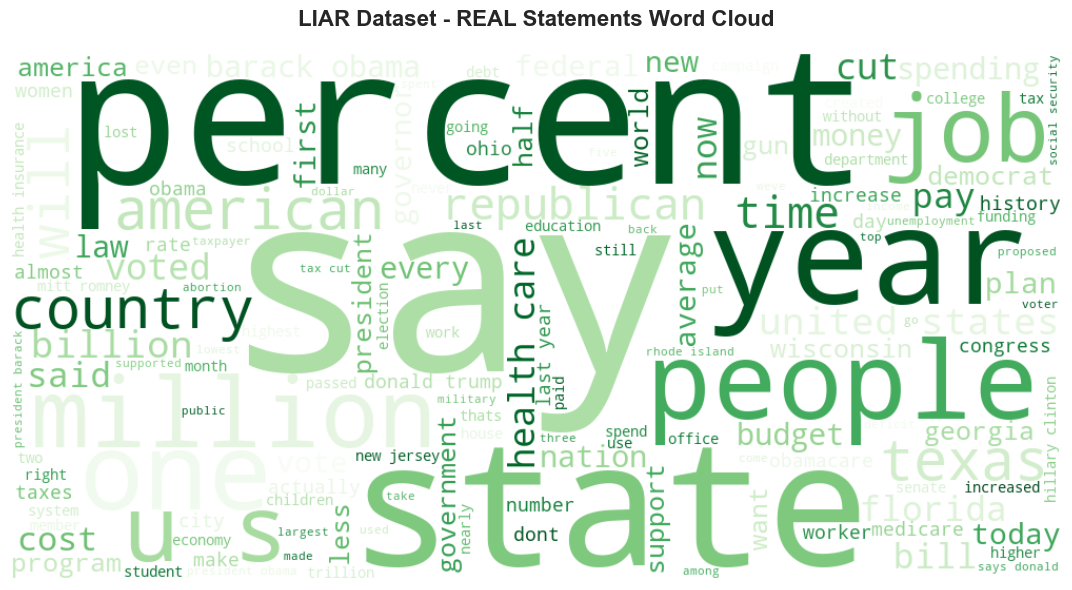

In [6]:
def create_wordcloud(df, label, title, colormap='viridis'):
    """Generate and display word cloud for a given label"""
    texts = ' '.join(df[df['label'] == label]['text'].values)
    
    wc = WordCloud(
        width=1000, 
        height=500, 
        background_color='white', 
        max_words=150,
        colormap=colormap,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(texts)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds
print("Generating word clouds...\n")

create_wordcloud(kaggle_train, 0, 'Kaggle Dataset - FAKE News Word Cloud', 'Reds')
create_wordcloud(kaggle_train, 1, 'Kaggle Dataset - REAL News Word Cloud', 'Greens')

create_wordcloud(liar_train, 0, 'LIAR Dataset - FAKE Statements Word Cloud', 'Reds')
create_wordcloud(liar_train, 1, 'LIAR Dataset - REAL Statements Word Cloud', 'Greens')

TOP CONTENT WORDS (Excluding Common Stop Words)


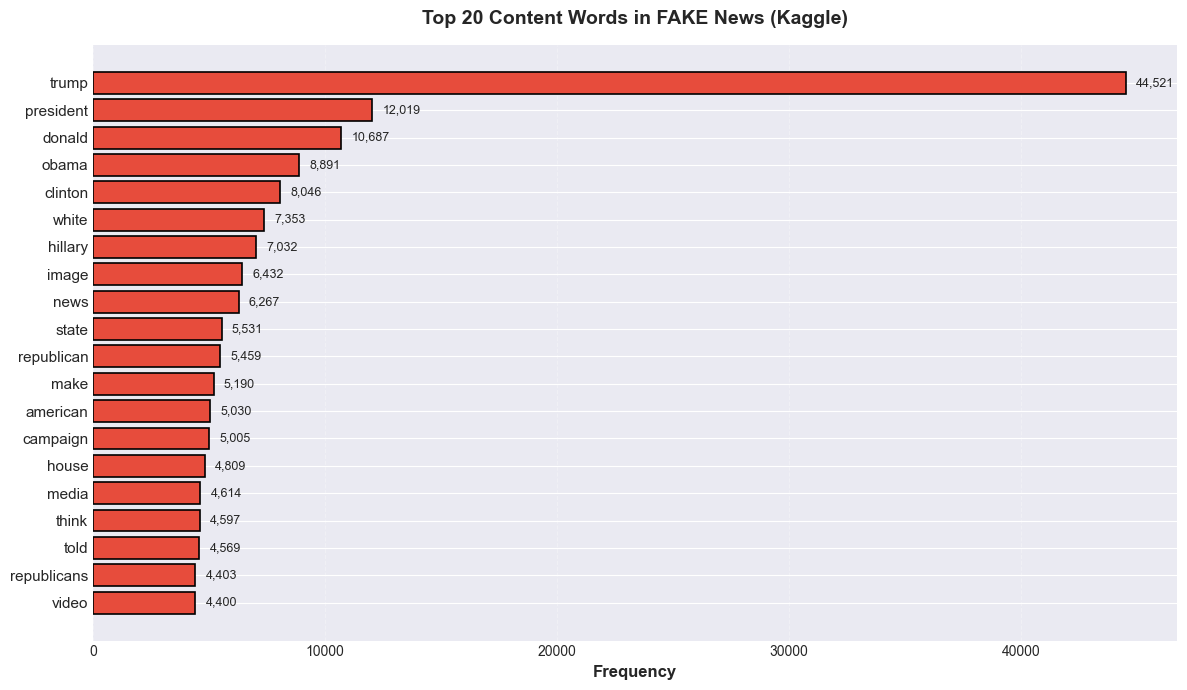

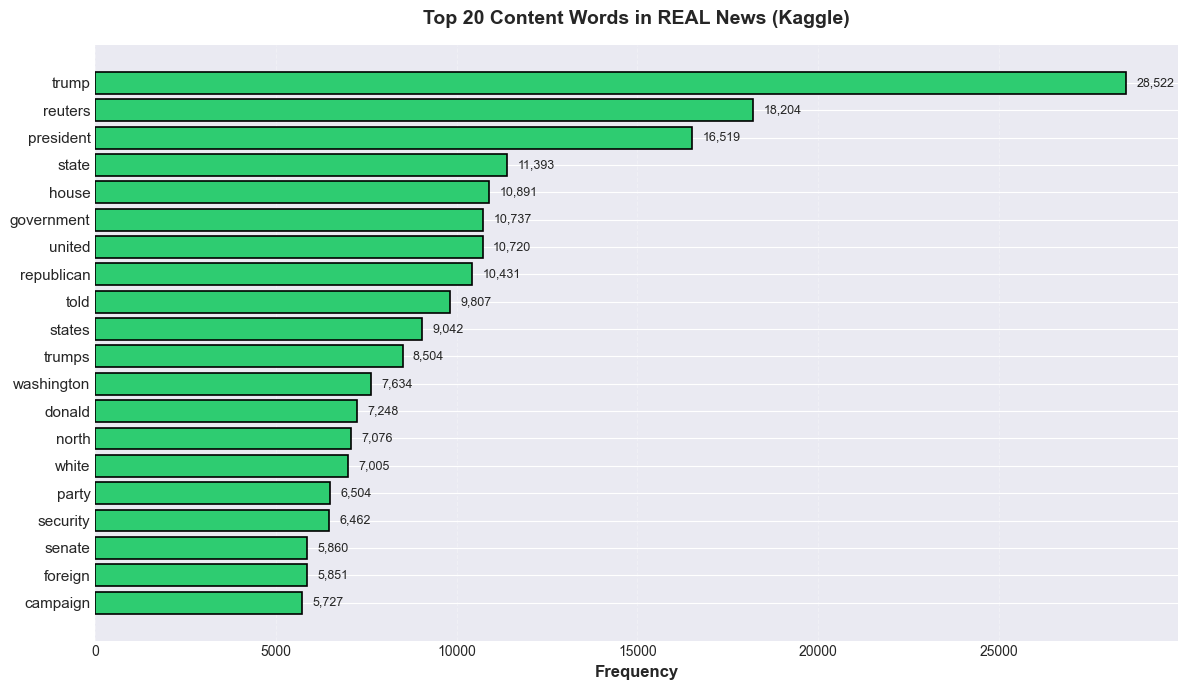

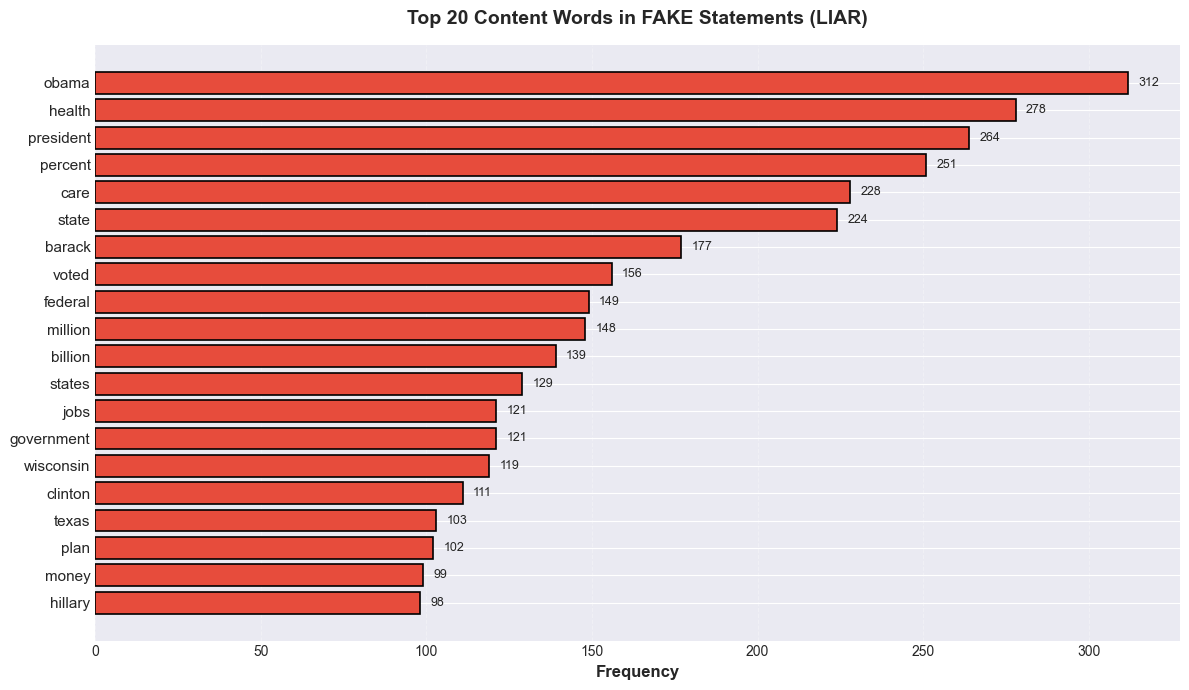

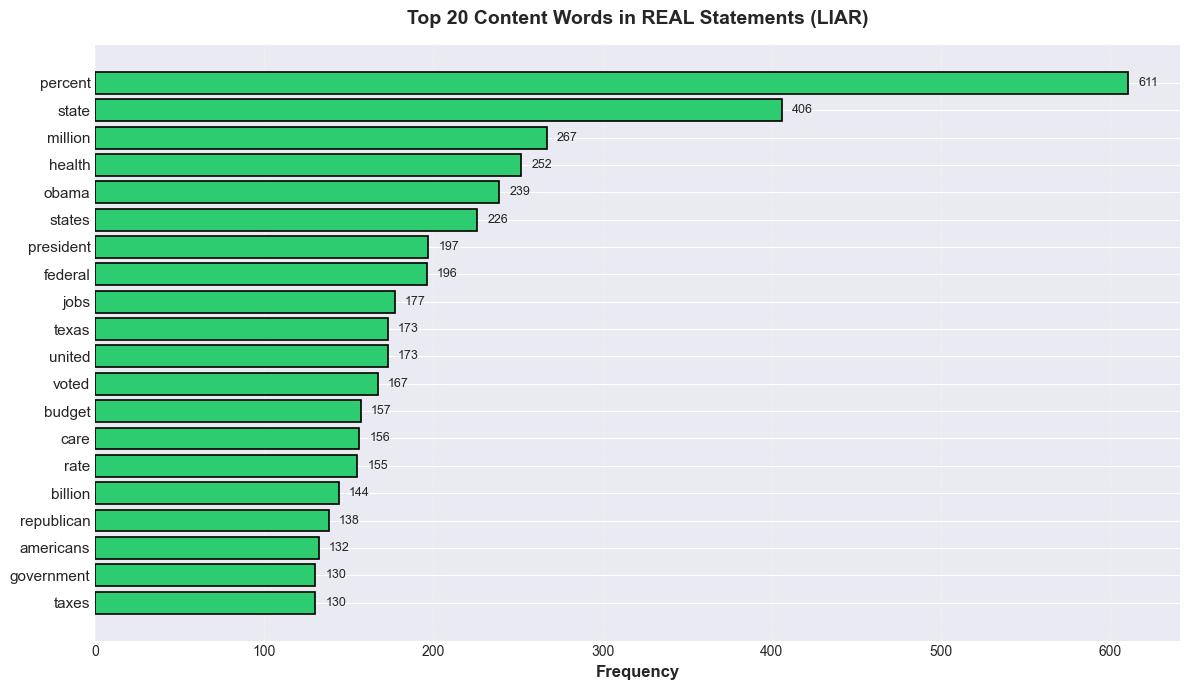

In [7]:
#Top Content Words Analysis

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

def plot_top_words(df, label, title, n=20, color='steelblue'):
    """Plot top N most frequent CONTENT words (excluding stop words)"""
    texts = ' '.join(df[df['label'] == label]['text'].values)
    
    # Extended stop words list
    stop_words = set(ENGLISH_STOP_WORDS) | {
        'says', 'said', 'according', 'reported', 'would', 'could', 
        'also', 'just', 'like', 'new', 'year', 'years', 'time',
        'people', 'know', 'going', 'dont', 'didnt', 'doesnt', 'thats'
    }
    
    # Filter meaningful words only
    words = [
        word for word in texts.split() 
        if len(word) > 3 
        and word not in stop_words 
        and not word.isdigit()
        and word.isalpha()  # Only alphabetic words
    ]
    
    word_freq = Counter(words).most_common(n)
    
    if not word_freq:
        print(f"No words found for {title}")
        return
    
    words_list, counts = zip(*word_freq)
    
    plt.figure(figsize=(12, 7))
    plt.barh(range(len(words_list)), counts, color=color, edgecolor='black', linewidth=1.2)
    plt.yticks(range(len(words_list)), words_list, fontsize=11)
    plt.xlabel('Frequency', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=15)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for i, v in enumerate(counts):
        plt.text(v + max(counts)*0.01, i, f'{v:,}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

print("="*70)
print("TOP CONTENT WORDS (Excluding Common Stop Words)")
print("="*70)

# Kaggle dataset
plot_top_words(kaggle_train, 0, 'Top 20 Content Words in FAKE News (Kaggle)', color='#e74c3c')
plot_top_words(kaggle_train, 1, 'Top 20 Content Words in REAL News (Kaggle)', color='#2ecc71')

# LIAR dataset
plot_top_words(liar_train, 0, 'Top 20 Content Words in FAKE Statements (LIAR)', color='#e74c3c')
plot_top_words(liar_train, 1, 'Top 20 Content Words in REAL Statements (LIAR)', color='#2ecc71')


BASELINE MODEL PERFORMANCE

dataset           model  accuracy       f1  precision   recall
 Kaggle TF-IDF + LogReg  0.987705 0.988706   0.985229 0.992208
 Kaggle    TF-IDF + SVM  0.993852 0.994346   0.992009 0.996694
 Kaggle     TF-IDF + RF  0.994621 0.995059   0.991559 0.998583
   LIAR TF-IDF + LogReg  0.592359 0.627832   0.640969 0.615222
   LIAR    TF-IDF + SVM  0.572666 0.610972   0.621898 0.600423
   LIAR     TF-IDF + RF  0.588814 0.627675   0.635379 0.620155


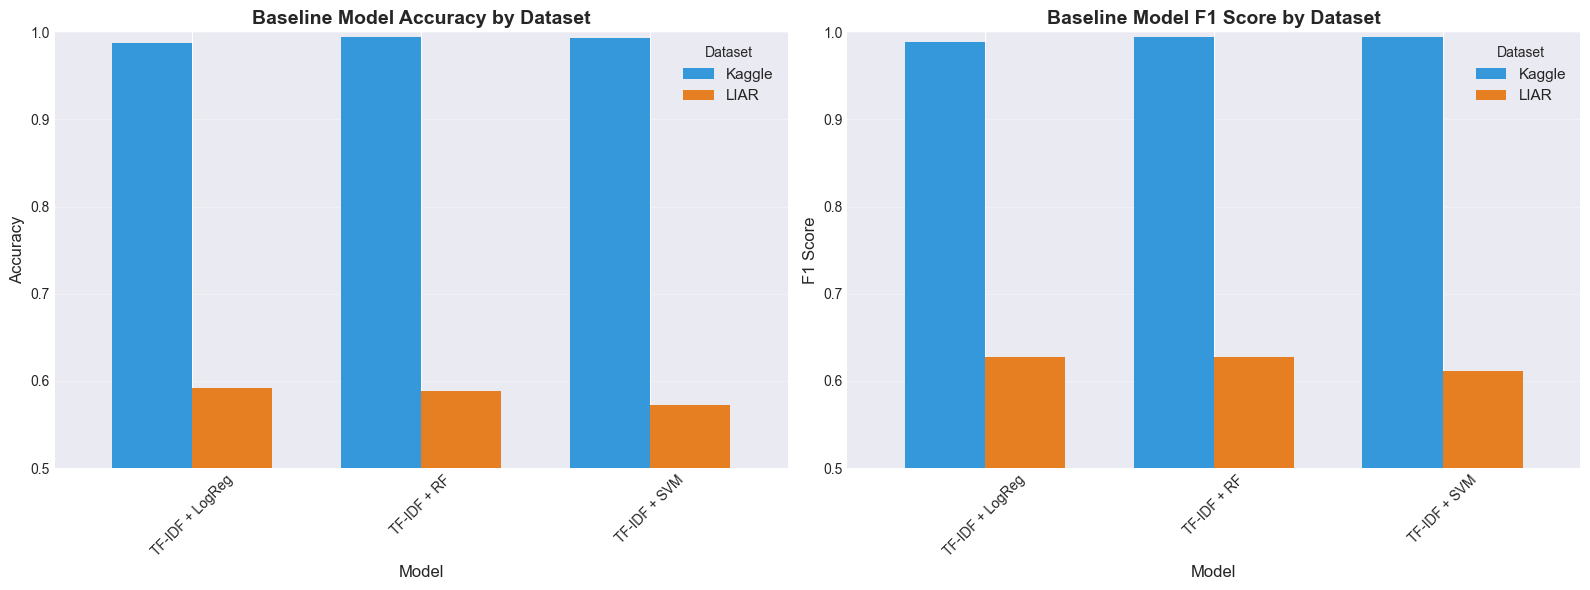


BEST PERFORMING MODELS

Kaggle: TF-IDF + RF - F1: 0.9951, Acc: 0.9946
LIAR:   TF-IDF + LogReg - F1: 0.6278, Acc: 0.5924

BASELINE MODEL INSIGHTS

 Best Kaggle Model: TF-IDF + RF
   → Accuracy: 0.9946
   → F1 Score: 0.9951

 Best LIAR Model: TF-IDF + LogReg
   → Accuracy: 0.5924
   → F1 Score: 0.6278

 Key Observations:
   • Kaggle performance: 99.5% accuracy (article-level)
   • LIAR performance: 59.2% accuracy (statement-level)
   • Kaggle is easier to classify (longer context may help)

 Benchmark for DistilBERT:
   Person 2 (Zaid) should aim to beat:
   • Kaggle: 0.9951 F1 score
   • LIAR: 0.6278 F1 score


In [8]:
# Load baseline results
baseline_results = pd.read_csv("../artifacts/metrics/baseline_results.csv")

print("\n" + "="*70)
print("BASELINE MODEL PERFORMANCE")
print("="*70 + "\n")
print(baseline_results.to_string(index=False))

# Visualize accuracy comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
pivot_acc = baseline_results.pivot(index='model', columns='dataset', values='accuracy')
pivot_acc.plot(kind='bar', ax=axes[0], color=['#3498db', '#e67e22'], rot=45, width=0.7)
axes[0].set_title('Baseline Model Accuracy by Dataset', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].legend(title='Dataset', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.5, 1.0])

# F1 Score comparison
pivot_f1 = baseline_results.pivot(index='model', columns='dataset', values='f1')
pivot_f1.plot(kind='bar', ax=axes[1], color=['#3498db', '#e67e22'], rot=45, width=0.7)
axes[1].set_title('Baseline Model F1 Score by Dataset', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1 Score', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].legend(title='Dataset', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.5, 1.0])

plt.tight_layout()
plt.show()

# Print best performing models
print("\n" + "="*60)
print("BEST PERFORMING MODELS")
print("="*60)
best_kaggle = baseline_results[baseline_results['dataset'] == 'Kaggle'].sort_values('f1', ascending=False).iloc[0]
best_liar = baseline_results[baseline_results['dataset'] == 'LIAR'].sort_values('f1', ascending=False).iloc[0]

print(f"\nKaggle: {best_kaggle['model']} - F1: {best_kaggle['f1']:.4f}, Acc: {best_kaggle['accuracy']:.4f}")
print(f"LIAR:   {best_liar['model']} - F1: {best_liar['f1']:.4f}, Acc: {best_liar['accuracy']:.4f}")


print("\n" + "="*70)
print("BASELINE MODEL INSIGHTS")
print("="*70)

# Find best models
best_kaggle = baseline_results[baseline_results['dataset'] == 'Kaggle'].sort_values('f1', ascending=False).iloc[0]
best_liar = baseline_results[baseline_results['dataset'] == 'LIAR'].sort_values('f1', ascending=False).iloc[0]

print(f"\n Best Kaggle Model: {best_kaggle['model']}")
print(f"   → Accuracy: {best_kaggle['accuracy']:.4f}")
print(f"   → F1 Score: {best_kaggle['f1']:.4f}")

print(f"\n Best LIAR Model: {best_liar['model']}")
print(f"   → Accuracy: {best_liar['accuracy']:.4f}")
print(f"   → F1 Score: {best_liar['f1']:.4f}")

print("\n Key Observations:")
print(f"   • Kaggle performance: {best_kaggle['accuracy']:.1%} accuracy (article-level)")
print(f"   • LIAR performance: {best_liar['accuracy']:.1%} accuracy (statement-level)")
print(f"   • {'Kaggle' if best_kaggle['accuracy'] > best_liar['accuracy'] else 'LIAR'} "
      f"is easier to classify (longer context may help)")

print("\n Benchmark for DistilBERT:")
print(f"   Person 2 (Zaid) should aim to beat:")
print(f"   • Kaggle: {best_kaggle['f1']:.4f} F1 score")
print(f"   • LIAR: {best_liar['f1']:.4f} F1 score")

In [9]:
# summary comparison
summary_data = {
    'Metric': ['Total Samples', 'Fake Samples', 'Real Samples', 'Avg Words (Fake)', 'Avg Words (Real)'],
    'Kaggle': [
        len(kaggle_train),
        len(kaggle_train[kaggle_train['label'] == 0]),
        len(kaggle_train[kaggle_train['label'] == 1]),
        kaggle_train[kaggle_train['label'] == 0]['text'].str.split().str.len().mean(),
        kaggle_train[kaggle_train['label'] == 1]['text'].str.split().str.len().mean()
    ],
    'LIAR': [
        len(liar_train),
        len(liar_train[liar_train['label'] == 0]),
        len(liar_train[liar_train['label'] == 1]),
        liar_train[liar_train['label'] == 0]['text'].str.split().str.len().mean(),
        liar_train[liar_train['label'] == 1]['text'].str.split().str.len().mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['Kaggle'] = summary_df['Kaggle'].apply(lambda x: f'{x:,.1f}' if isinstance(x, float) else f'{x:,}')
summary_df['LIAR'] = summary_df['LIAR'].apply(lambda x: f'{x:,.1f}' if isinstance(x, float) else f'{x:,}')

print("\n" + "="*60)
print("DATASET COMPARISON SUMMARY")
print("="*60 + "\n")
print(summary_df.to_string(index=False))


DATASET COMPARISON SUMMARY

          Metric   Kaggle    LIAR
   Total Samples 27,328.0 8,886.0
    Fake Samples 12,505.0 3,922.0
    Real Samples 14,823.0 4,964.0
Avg Words (Fake)    429.6    17.5
Avg Words (Real)    392.2    18.6


In [10]:
# Most Distinctive Words - Fake vs Real Comparison

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def get_distinctive_words(df, target_label, n=15):
    """
    Find words that appear MORE frequently in target_label compared to the other label.
    This helps identify linguistic markers that distinguish fake from real news.
    """
    stop_words = set(ENGLISH_STOP_WORDS) | {
        'says', 'said', 'according', 'would', 'could', 'also', 'new', 
        'year', 'years', 'reported', 'just', 'like', 'going'
    }
    
    # Words in target label
    target_texts = ' '.join(df[df['label'] == target_label]['text'].values)
    target_words = [
        w for w in target_texts.split() 
        if len(w) > 3 and w not in stop_words and w.isalpha()
    ]
    target_freq = Counter(target_words)
    
    # Words in other label
    other_label = 1 - target_label
    other_texts = ' '.join(df[df['label'] == other_label]['text'].values)
    other_words = [
        w for w in other_texts.split() 
        if len(w) > 3 and w not in stop_words and w.isalpha()
    ]
    other_freq = Counter(other_words)
    
    # Calculate distinctiveness ratio
    distinctive = {}
    for word, count in target_freq.most_common(200):
        if count >= 20:  # Must appear at least 20 times
            other_count = other_freq.get(word, 1)
            ratio = count / other_count
            if ratio > 1.5:  # At least 50% more common in this label
                distinctive[word] = (count, ratio)
    
    # Sort by frequency and return top N
    return sorted(distinctive.items(), key=lambda x: x[1][0], reverse=True)[:n]

print("\n" + "="*80)
print(" "*20 + "DISTINCTIVE WORDS ANALYSIS")
print(" "*10 + "Words that distinguish FAKE from REAL news")
print("="*80)

# ========== KAGGLE DATASET ==========
print("\n" + "="*80)
print("KAGGLE DATASET - Linguistic Markers")
print("="*80)

fake_dist_kaggle = get_distinctive_words(kaggle_train, 0, n=15)
real_dist_kaggle = get_distinctive_words(kaggle_train, 1, n=15)

print("\n🔴 Words MORE common in FAKE news (potential fake news markers):")
print(f"{'Word':<20} {'Count':>8} {'Ratio vs Real':>15}")
print("-" * 50)
for word, (count, ratio) in fake_dist_kaggle:
    print(f"{word:<20} {count:>8,} {ratio:>14.1f}x")

print("\n🟢 Words MORE common in REAL news (credibility markers):")
print(f"{'Word':<20} {'Count':>8} {'Ratio vs Fake':>15}")
print("-" * 50)
for word, (count, ratio) in real_dist_kaggle:
    print(f"{word:<20} {count:>8,} {ratio:>14.1f}x")

# ========== LIAR DATASET ==========
print("\n\n" + "="*80)
print("LIAR DATASET - Linguistic Markers")
print("="*80)

fake_dist_liar = get_distinctive_words(liar_train, 0, n=15)
real_dist_liar = get_distinctive_words(liar_train, 1, n=15)

print("\n🔴 Words MORE common in FAKE statements (misinformation markers):")
print(f"{'Word':<20} {'Count':>8} {'Ratio vs Real':>15}")
print("-" * 50)
for word, (count, ratio) in fake_dist_liar:
    print(f"{word:<20} {count:>8,} {ratio:>14.1f}x")

print("\n🟢 Words MORE common in REAL statements (truthfulness markers):")
print(f"{'Word':<20} {'Count':>8} {'Ratio vs Real':>15}")
print("-" * 50)
for word, (count, ratio) in real_dist_liar:
    print(f"{word:<20} {count:>8,} {ratio:>14.1f}x")

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print("""
These distinctive words reveal linguistic patterns that models can exploit:
- Fake news often uses more sensational/emotional language
- Real news tends to cite sources and use institutional language
- Political names appear in both but with different contextual patterns
- These patterns form the basis for ML classification features
""")


                    DISTINCTIVE WORDS ANALYSIS
          Words that distinguish FAKE from REAL news

KAGGLE DATASET - Linguistic Markers

🔴 Words MORE common in FAKE news (potential fake news markers):
Word                    Count   Ratio vs Real
--------------------------------------------------
trump                  44,521            1.6x
obama                   8,891            2.1x
clinton                 8,046            1.8x
hillary                 7,032            3.7x
image                   6,432           30.3x
news                    6,267            1.6x
american                5,030            1.7x
know                    4,813            3.7x
media                   4,614            1.9x
think                   4,597            1.7x
video                   4,400            7.5x
america                 4,208            4.3x
right                   4,088            2.4x
black                   4,057            5.6x
want                    3,997            1.6x

🟢 Words M

Distinctive Words Visualization



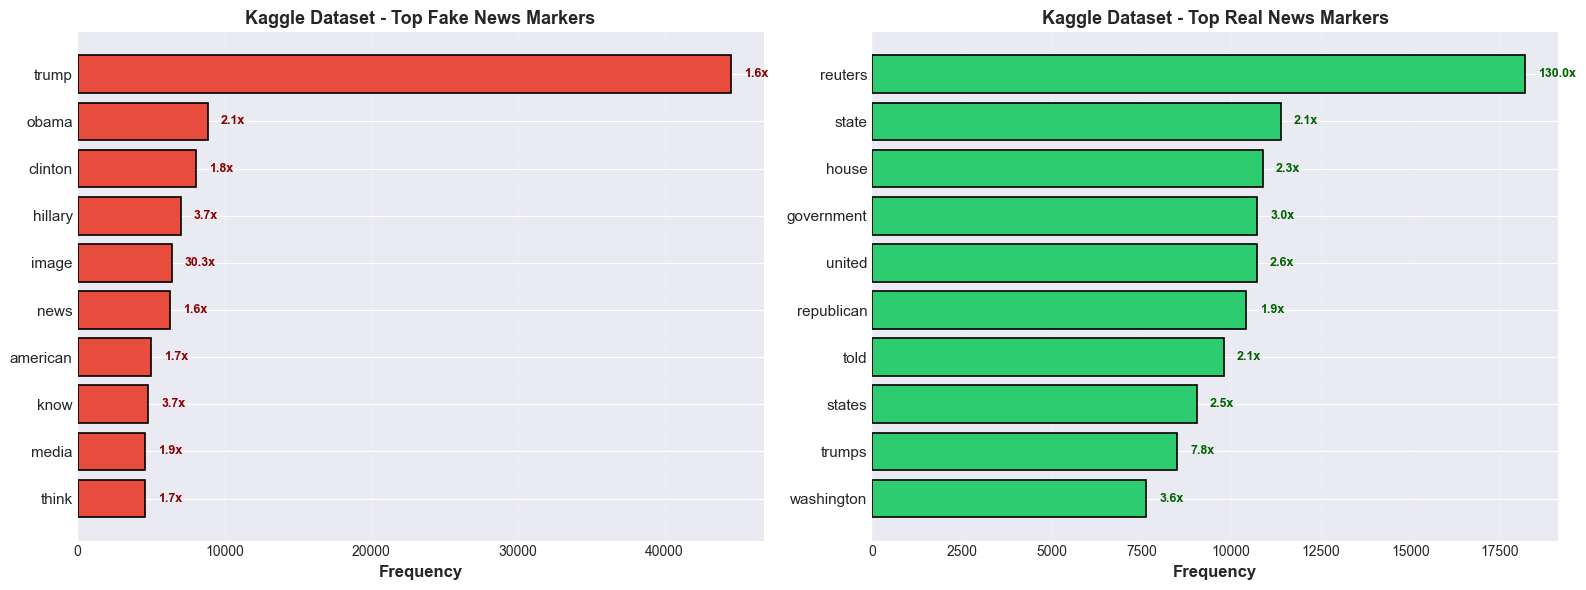

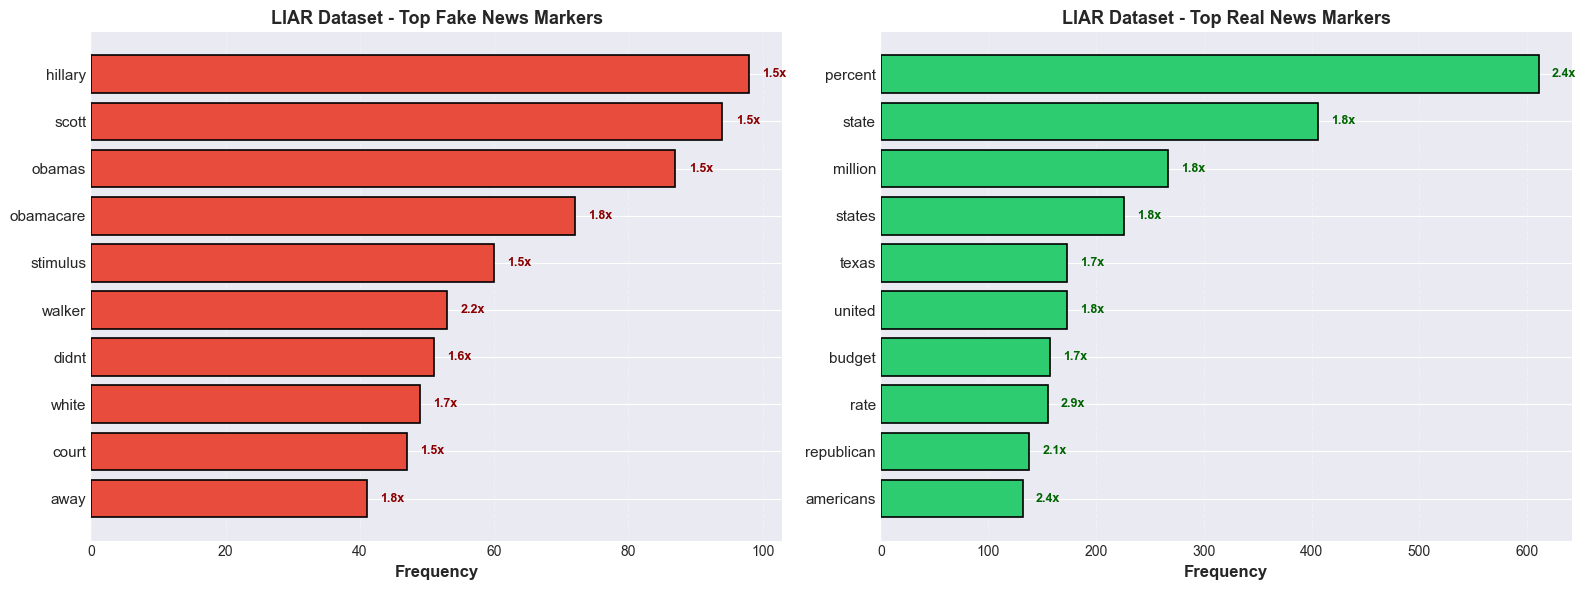

In [11]:
#Visual Comparison of Distinctive Words

def plot_distinctive_comparison(df, dataset_name):
    """Create side-by-side bar charts of distinctive words"""
    fake_words = get_distinctive_words(df, 0, n=10)
    real_words = get_distinctive_words(df, 1, n=10)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Fake news distinctive words
    if fake_words:
        words, data = zip(*fake_words)
        counts, ratios = zip(*data)
        ax1.barh(range(len(words)), counts, color='#e74c3c', edgecolor='black', linewidth=1.2)
        ax1.set_yticks(range(len(words)))
        ax1.set_yticklabels(words, fontsize=11)
        ax1.set_xlabel('Frequency', fontsize=12, fontweight='bold')
        ax1.set_title(f'{dataset_name} - Top Fake News Markers', fontsize=13, fontweight='bold')
        ax1.invert_yaxis()
        ax1.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Add ratio annotations
        for i, (count, ratio) in enumerate(zip(counts, ratios)):
            ax1.text(count + max(counts)*0.02, i, f'{ratio:.1f}x', 
                    va='center', fontsize=9, color='darkred', fontweight='bold')
    
    # Real news distinctive words
    if real_words:
        words, data = zip(*real_words)
        counts, ratios = zip(*data)
        ax2.barh(range(len(words)), counts, color='#2ecc71', edgecolor='black', linewidth=1.2)
        ax2.set_yticks(range(len(words)))
        ax2.set_yticklabels(words, fontsize=11)
        ax2.set_xlabel('Frequency', fontsize=12, fontweight='bold')
        ax2.set_title(f'{dataset_name} - Top Real News Markers', fontsize=13, fontweight='bold')
        ax2.invert_yaxis()
        ax2.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Add ratio annotations
        for i, (count, ratio) in enumerate(zip(counts, ratios)):
            ax2.text(count + max(counts)*0.02, i, f'{ratio:.1f}x', 
                    va='center', fontsize=9, color='darkgreen', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("Distinctive Words Visualization\n")
plot_distinctive_comparison(kaggle_train, 'Kaggle Dataset')
plot_distinctive_comparison(liar_train, 'LIAR Dataset')